In [1]:
import numpy as np, matplotlib.pyplot as plt
plt.xkcd();

In [10]:
from scipy.optimize import minimize, fmin_bfgs, fmin_ncg, rosen, rosen_der

In [6]:
def R(x):
    return (1.-x[0])**2 + (x[1]-x[0]**2)**2

def jacR(x):
    return np.array([-2.*(1.-x[0])-4.*x[0]*(x[1]-x[0]**2), 2.*(x[1]-x[0]**2)])

In [7]:
res = fmin_bfgs(R, [-2.,2.], fprime=jacR, retall=True)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15


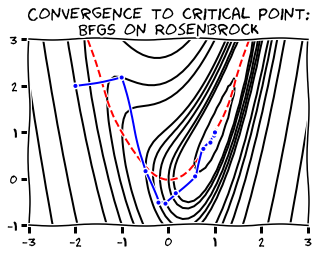

In [8]:
x = np.linspace(-3,3)
y = np.linspace(-3,3)
X,Y = np.meshgrid(x,y)
steps = res[1]

plt.figure(figsize=(5,5))
plt.axes(aspect='equal')
plt.contour(X,Y,(1-X)**2+(Y-X**2)**2, colors='k', levels=[0.2,0.8,1,1.4,1.78,2.23,4,5.4,8,13,32,64])
plt.plot(x,x**2,'r--')
plt.xlim(-3,3)
plt.ylim(-1,3)
plt.plot([p[0] for p in res[1]], [p[1] for p in res[1]], 'b.-')
plt.title("Convergence to critical point:\nBFGS on Rosenbrock")
plt.show()

In [9]:
[(x[0],x[1],R(x)) for x in res[1]]

[(-2.0, 2.0, 13.0),
 (-1.0062913907990934, 2.1806742925819829, 5.3895504545360051),
 (-0.4926027547629821, 0.16652640812127606, 2.2336589227178854),
 (-0.21524357842657599, -0.50935540007501645, 1.7856029943265779),
 (-0.063955989069247265, -0.5316928895609252, 1.4190660463352331),
 (0.15734222582418086, -0.30849721731155394, 0.82113021515368634),
 (0.57381603855813146, 0.053273834714051449, 0.25780380735973674),
 (0.75126902054838318, 0.64575073136289951, 0.068484205172098578),
 (0.90270669159556505, 0.78070619192196311, 0.0106337940320938),
 (0.98453909728206723, 0.93168365042320367, 0.0016553261314797556),
 (0.99596090225875322, 0.98757906912369564, 3.5315624888549397e-05),
 (0.99983972371278274, 0.99960214001931258, 3.166889578638965e-08),
 (0.99999974575212114, 0.99999816067039615, 1.8357608818806458e-12)]

In [16]:
fmin_ncg(rosen, [-2.,2.], fprime=rosen_der, retall=False)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 277
         Function evaluations: 300
         Gradient evaluations: 1540
         Hessian evaluations: 0


array([ 0.99999993,  0.99999987])

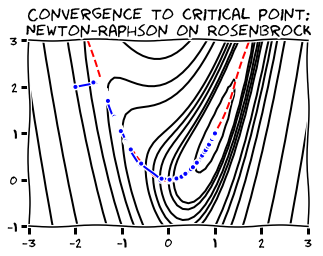

In [14]:
plt.figure(figsize=(5,5))
plt.axes(aspect='equal')
plt.contour(X,Y,(1-X)**2+(Y-X**2)**2, colors='k', levels=[0.2,0.8,1,1.4,1.78,2.23,4,5.4,8,13,32,64])
plt.plot(x,x**2,'r--')
plt.xlim(-3,3)
plt.ylim(-1,3)
plt.plot([p[0] for p in res2[1]], [p[1] for p in res2[1]], 'b.-')
plt.title("Convergence to critical point:\nNewton-Raphson on Rosenbrock")
plt.show()